In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.model.instance_hardness import *
from src.utils import *
from src.visualization.plots import *
from src.model.ddn import *

np.random.seed(1234)

n = 300

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [30]:
y.sum()

600

## Conjunto de datos de train

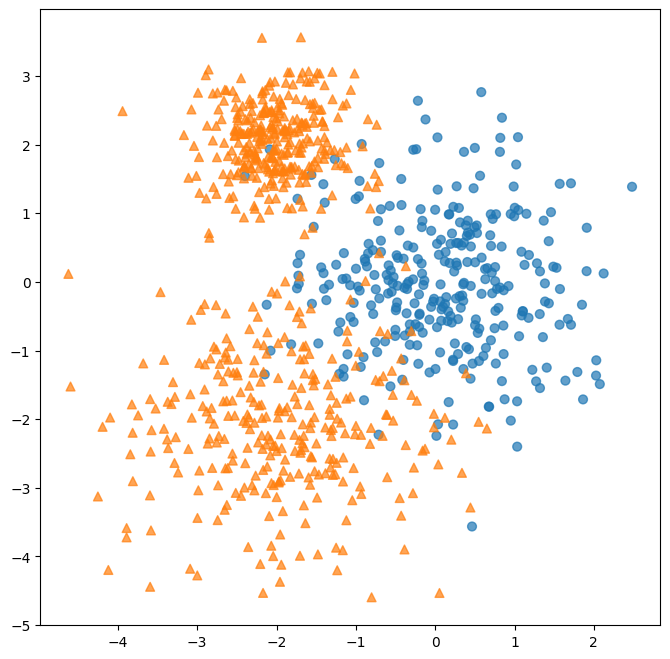

In [31]:
figure = plt.figure(figsize=[8, 8])
ax = figure.add_subplot()

area1 = np.ma.masked_where(y > 0 , y) + 40
area2 = np.ma.masked_where(y < 1, y) + 39


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, a in [('o', area1), ('^', area2)]:
    ax.scatter(X[:,0], X[:,1], alpha=0.7, s=a, marker=m)


plt.show()

In [32]:
figure.savefig('images/data_artificial.png');

### Cálculo de complejidad

#### KDN

In [33]:
complexity, _ = kdn_score(X, y, 5)

In [34]:
complexity_series = pd.Series(complexity)
complexity_series[complexity_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    199.000000
mean       0.420101
std        0.274134
min        0.200000
10%        0.200000
20%        0.200000
30%        0.200000
40%        0.200000
50%        0.400000
60%        0.400000
70%        0.400000
80%        0.600000
90%        0.840000
max        1.000000
dtype: float64

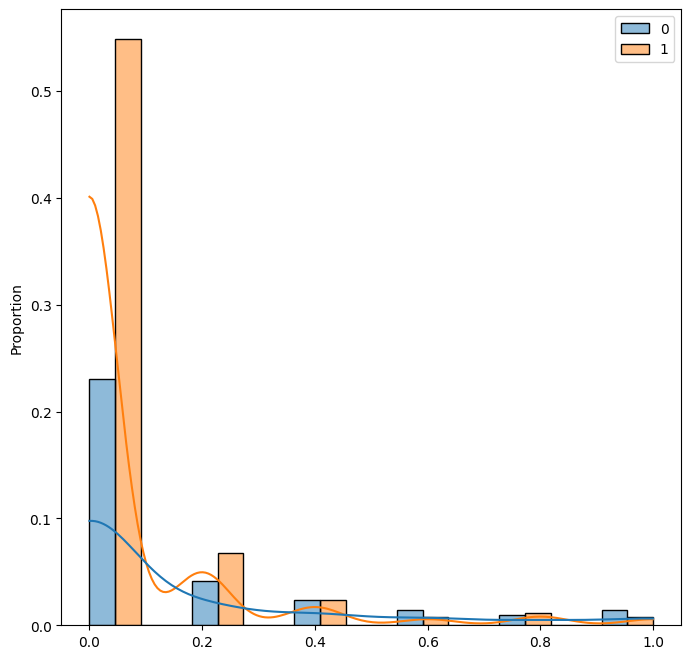

In [35]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [36]:
figure.savefig('images/kdn_artificial.png');

In [37]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y < 1])
class1_complexity = np.mean(complexity[y > 0])

In [38]:
global_complexity

0.09288888888888888

In [39]:
class1_complexity

0.06633333333333334

In [40]:
class0_complexity

0.146

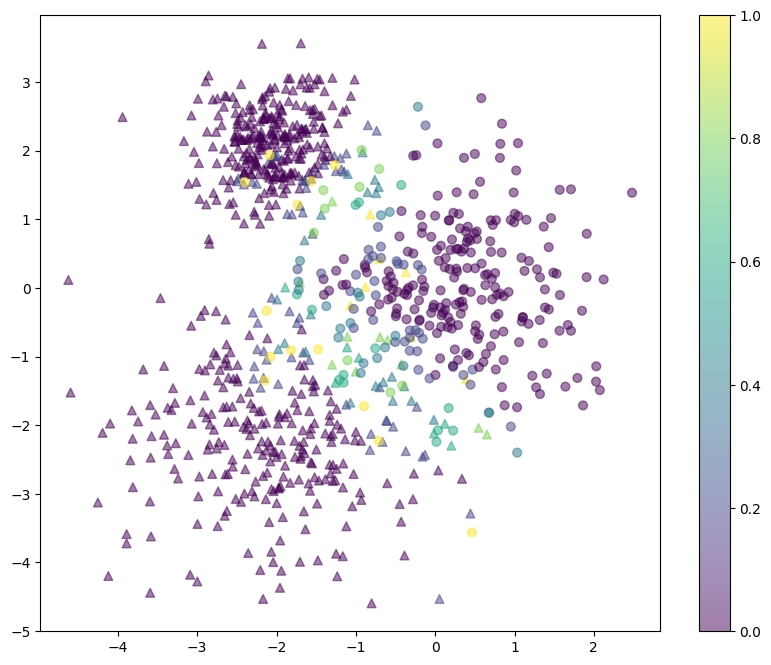

In [41]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

In [42]:
figure.savefig('images/kdn_artificial_scatter.png');

#### Dynamic KDN

In [43]:
ddn = DDN(k=2)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [44]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    148.000000
mean       0.538986
std        0.285773
min        0.090000
10%        0.197000
20%        0.260000
30%        0.340000
40%        0.468000
50%        0.500000
60%        0.520000
70%        0.645000
80%        1.000000
90%        1.000000
max        1.000000
dtype: float64

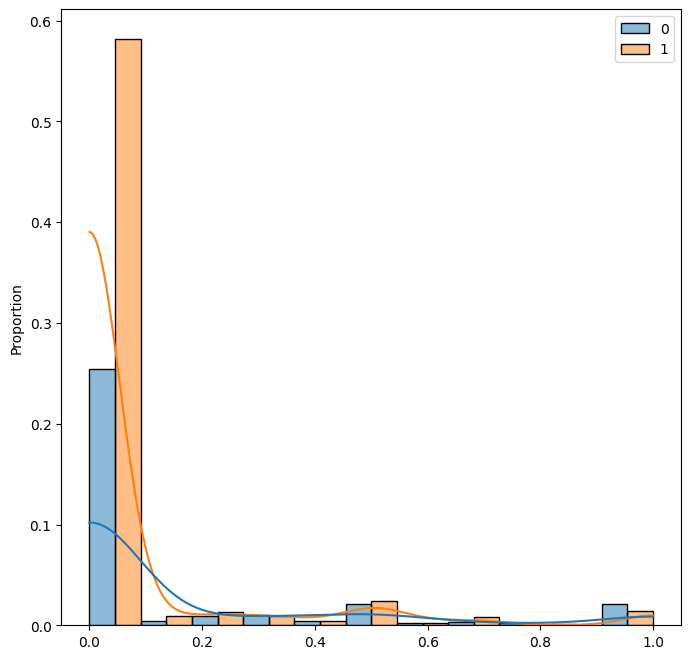

In [45]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [46]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [47]:
global_complexity_d

0.08863333333333334

In [48]:
class1_complexity_d

0.06425

In [49]:
class0_complexity_d

0.1374

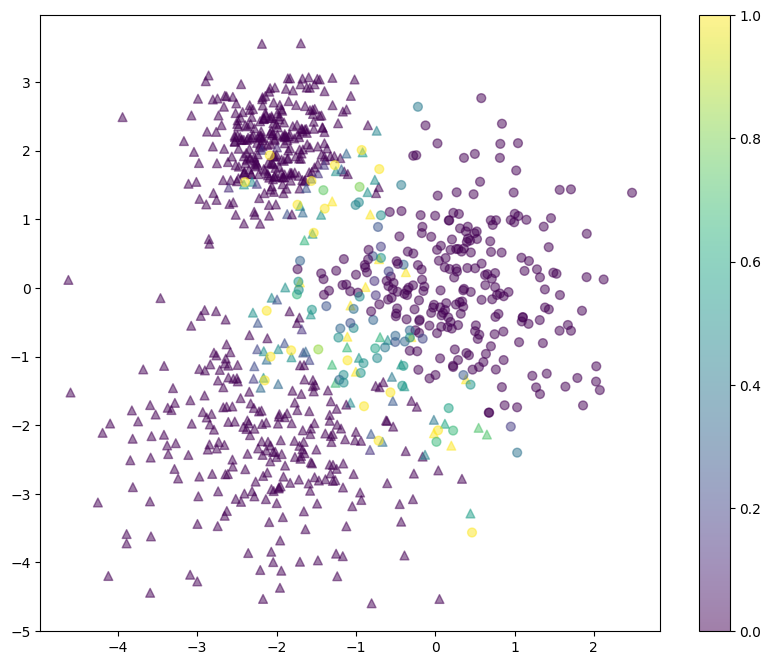

In [50]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[ddn.support_neighbours[i]][:, 0], X_train[ddn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           ddn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [51]:
ddn = DDN(k=3)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [52]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    197.000000
mean       0.416345
std        0.283125
min        0.020000
10%        0.140000
20%        0.190000
30%        0.220000
40%        0.250000
50%        0.320000
60%        0.370000
70%        0.510000
80%        0.680000
90%        1.000000
max        1.000000
dtype: float64

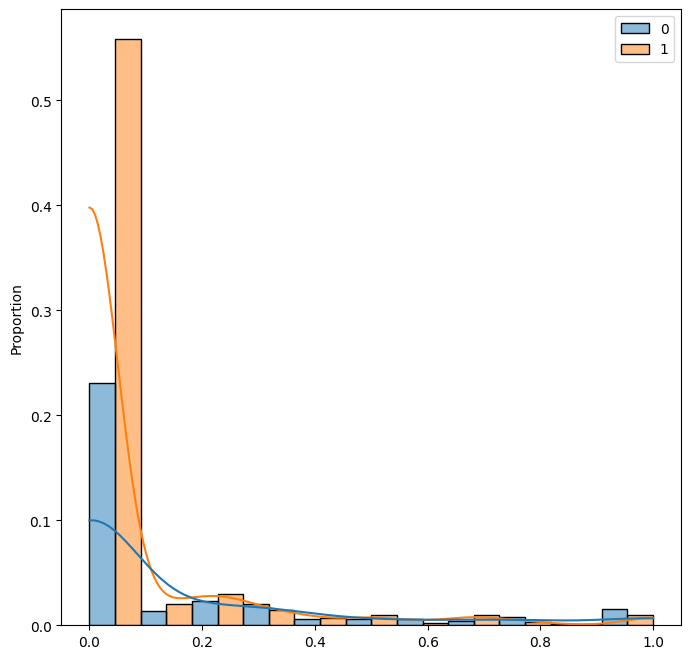

In [53]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [54]:
figure.savefig('../images/ddn_artificial.png');

FileNotFoundError: [Errno 2] No such file or directory: '/home/vacek/Proyectos/images/ddn_artificial.png'

In [ ]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [ ]:
global_complexity_d

0.09113333333333334

In [ ]:
class1_complexity_d

0.06578333333333333

In [ ]:
class0_complexity_d

0.14183333333333334

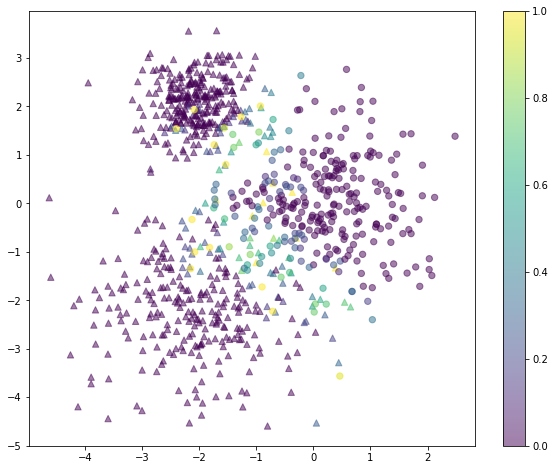

In [ ]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[ddn.support_neighbours[i]][:, 0], X_train[ddn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           ddn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

In [ ]:
figure.savefig('images/ddn_artificial_scatter.png');

#### Dynamic KDN

In [ ]:
ddn = DDN(k=4)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [ ]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    220.000000
mean       0.374409
std        0.280611
min        0.010000
10%        0.120000
20%        0.158000
30%        0.187000
40%        0.210000
50%        0.250000
60%        0.338000
70%        0.456000
80%        0.642000
90%        0.840000
max        1.000000
dtype: float64

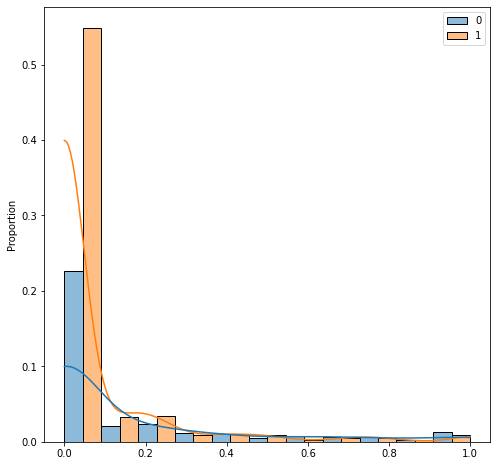

In [ ]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [ ]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [ ]:
global_complexity_d

0.09152222222222223

In [ ]:
class1_complexity_d

0.066

In [ ]:
class0_complexity_d

0.14256666666666667

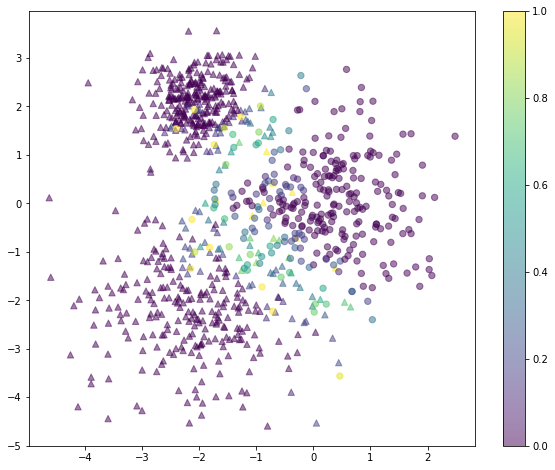

In [ ]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[ddn.support_neighbours[i]][:, 0], X_train[ddn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           ddn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [ ]:
ddn = DDN(k=4)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [ ]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    220.000000
mean       0.374409
std        0.280611
min        0.010000
10%        0.120000
20%        0.158000
30%        0.187000
40%        0.210000
50%        0.250000
60%        0.338000
70%        0.456000
80%        0.642000
90%        0.840000
max        1.000000
dtype: float64

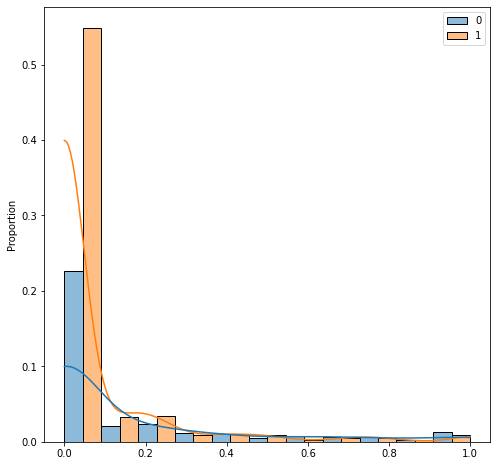

In [ ]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [ ]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [ ]:
global_complexity_d

0.09152222222222223

In [ ]:
class1_complexity_d

0.066

In [ ]:
class0_complexity_d

0.14256666666666667

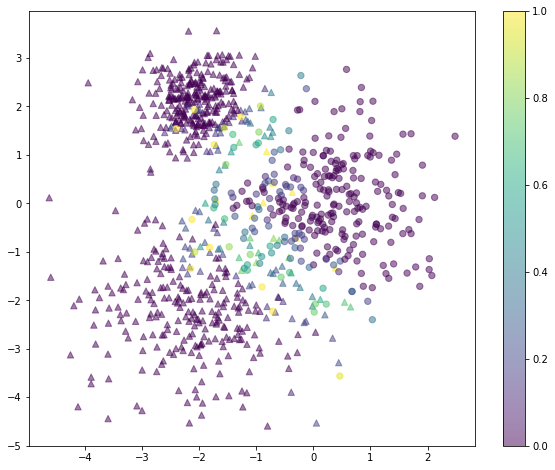

In [ ]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[ddn.support_neighbours[i]][:, 0], X_train[ddn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           ddn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [ ]:
ddn = DDN(k=5)
ddn.fit(X, y)
complexity_d = ddn.complexity

In [ ]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    242.000000
mean       0.341570
std        0.276382
min        0.010000
10%        0.090000
20%        0.130000
30%        0.150000
40%        0.180000
50%        0.215000
60%        0.326000
70%        0.400000
80%        0.580000
90%        0.838000
max        1.000000
dtype: float64

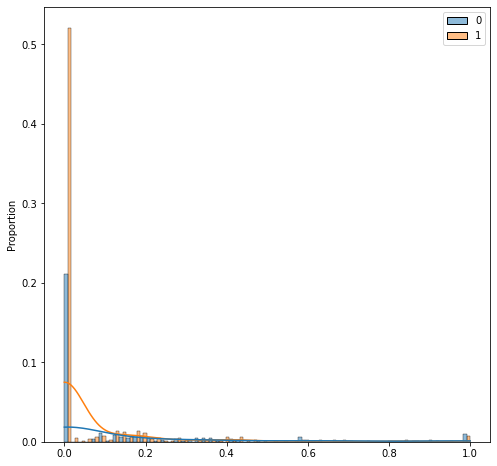

In [ ]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [ ]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [ ]:
global_complexity_d

0.09184444444444444

In [ ]:
class1_complexity_d

0.06588333333333334

In [ ]:
class0_complexity_d

0.14376666666666668

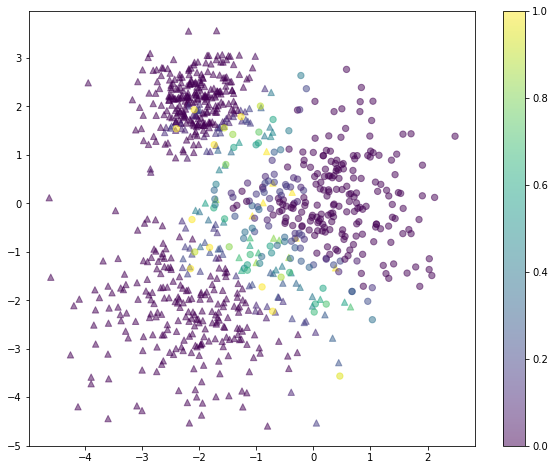

In [ ]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[ddn.support_neighbours[i]][:, 0], X_train[ddn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           ddn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()